<a href="https://colab.research.google.com/github/choimin1243/CNN0609/blob/master/CNN0610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install git+http://github.com/nockchun/rspy --force

  Cloning http://github.com/nockchun/rspy to /tmp/pip-req-build-c4u6mxum
  Running command git clone -q http://github.com/nockchun/rspy /tmp/pip-req-build-c4u6mxum
  Created wheel for rspy: filename=rspy-0.1.0-cp36-none-any.whl size=10243 sha256=b46aee50ecdfe72b6cbd8e29b3297408bee91013b612cbd3ebc6167a7e1eaa56
  Stored in directory: /tmp/pip-ephem-wheel-cache-qcf4epjq/wheels/d0/ee/dd/4d938257362e3c9fdd5f32531ef2c14d862d62d057cdeca6bf
Successfully built rspy


In [0]:
from PIL import Image, ImageFilter

In [0]:
from ipywidgets import interact


In [0]:
imgOrgin=Image.open("sample_data/image.jpg")

In [0]:
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses


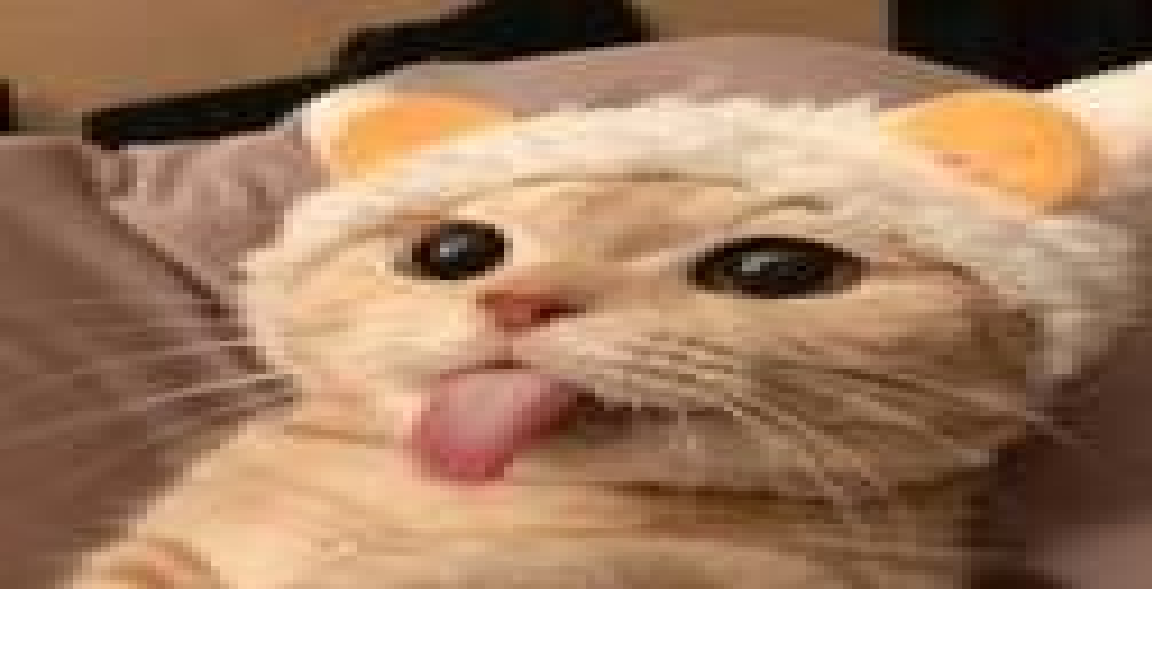

In [18]:
imgOrgin

In [0]:
KernelEdge2=[-1,-1,-1,-1,8,-1,-1,-1,-1]

In [0]:
convolution=imgOrgin.filter(ImageFilter.Kernel((3,3),KernelEdge2,1,0))

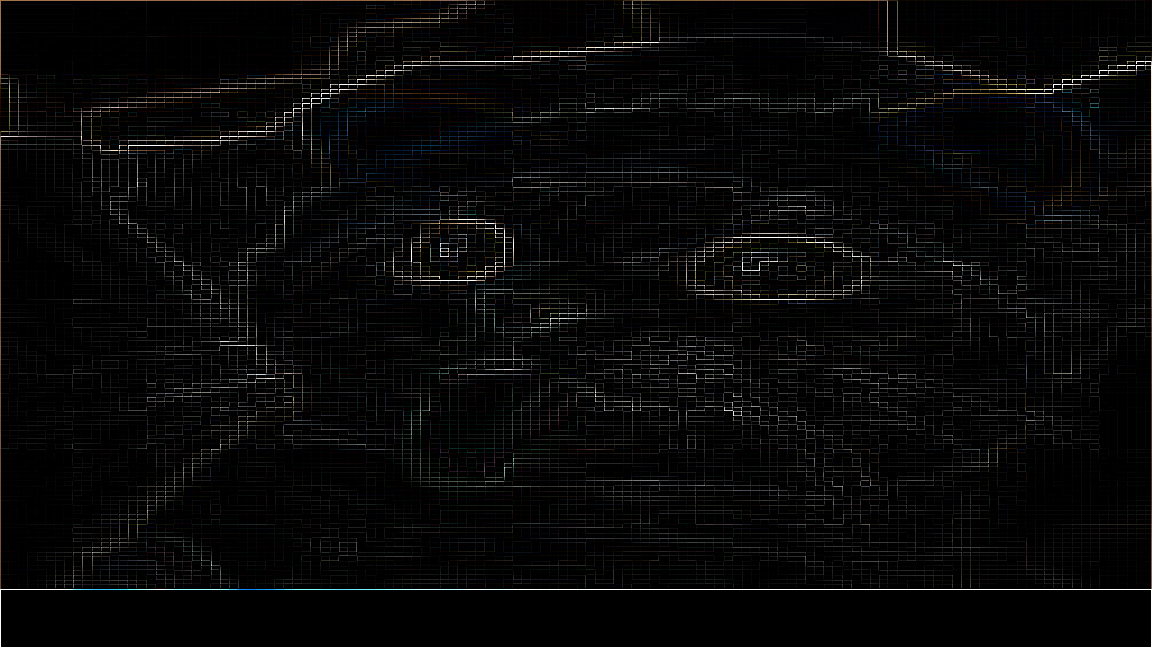

In [21]:
convolution

In [22]:
(trainDatas,trainLabels),(testDatas,testLabels)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [53]:
# print(testDatas[7])
# plt.imshow(testDatas[7].reshape(28,28))
print(testLabels[7])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
trainDatas.shape, trainLabels.shape, testDatas.shape, testLabels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
import numpy as np

In [26]:
print(trainLabels)

[5 0 4 ... 5 6 8]


In [0]:
trainDatas=trainDatas.reshape(-1,28,28,1)
testDatas=testDatas.reshape(-1,28,28,1)

In [0]:
trainLabels=np.eye(10)[trainLabels]
testLabels=np.eye(10)[testLabels]

In [0]:
model=models.Sequential([layers.Input([28,28,1]),
                         layers.Conv2D(32,(3,3),(1,1),"valid",activation=tf.keras.activations.relu),
                         layers.MaxPool2D((2,2),(2,2)),
                         layers.Conv2D(32,(3,3),(1,1),"same",activation=tf.keras.activations.relu),
                         layers.Flatten(),
                         layers.Dense(256,activation=tf.keras.activations.relu),
                         layers.Dropout(0.5),
                         layers.Dense(10,activation=tf.keras.activations.softmax)
                         
                         ])

In [0]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

In [32]:
history = model.fit(
    trainDatas, trainLabels,
    batch_size=1000,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
48/48 [==============================] - 37s 767ms/step - loss: 6.8556 - accuracy: 0.6112 - val_loss: 0.4358 - val_accuracy: 0.8882
Epoch 2/20
48/48 [==============================] - 37s 763ms/step - loss: 0.7570 - accuracy: 0.8049 - val_loss: 0.2768 - val_accuracy: 0.9203
Epoch 3/20
48/48 [==============================] - 36s 760ms/step - loss: 0.5243 - accuracy: 0.8530 - val_loss: 0.2241 - val_accuracy: 0.9362
Epoch 4/20
48/48 [==============================] - 36s 755ms/step - loss: 0.4215 - accuracy: 0.8803 - val_loss: 0.1968 - val_accuracy: 0.9455
Epoch 5/20
48/48 [==============================] - 36s 750ms/step - loss: 0.3582 - accuracy: 0.8974 - val_loss: 0.1724 - val_accuracy: 0.9518
Epoch 6/20
48/48 [==============================] - 36s 755ms/step - loss: 0.3062 - accuracy: 0.9124 - val_loss: 0.1535 - val_accuracy: 0.9579
Epoch 7/20
48/48 [==============================] - 36s 747ms/step - loss: 0.2609 - accuracy: 0.9259 - val_loss: 0.1383 - val_accuracy: 0.9625

In [33]:
evaLoss, evaAcc = model.evaluate(testDatas, testLabels, verbose=0)
evaLoss, "{:3.2f} %".format(evaAcc*100)


(0.07353799790143967, '98.08 %')

In [0]:
import matplotlib.pyplot as plt


In [39]:
@interact(idx=(0, 10000, 1))
def showTestImage(idx):
    data = testDatas[idx].reshape(-1, 28, 28, 1)
    dataPred = model.predict(data.astype(float))
    
    plt.imshow(testDatas[idx].reshape(28,28), cmap="gray")
    plt.grid(False)
    plt.title(f"LABEL: {np.argmax(testLabels[idx])}, PREDICT: {np.argmax(dataPred)}")
    plt.show()


interactive(children=(IntSlider(value=5000, description='idx', max=10000), Output()), _dom_classes=('widget-in…

AxesImage(54,36;334.8x217.44)
4


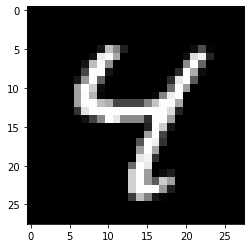

In [42]:
    data = testDatas[6].reshape(-1, 28, 28, 1)
    dataPred = model.predict(data.astype(float))

    print(plt.imshow(testDatas[6].reshape(28,28), cmap="gray"))
    print(np.argmax(dataPred))
